In [2]:
import argparse
import pprint
import sys
import os
import json
import spotipy
import spotipy.util as util
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

client_id= "a82ef03cc3f44042b0f07c3c9220f175"
client_secret= "e049de0fb2a94fa9990ca6565ac7a053"
redirect_uri='http://localhost:8888/callback'
username='22am6rooejanltf555ip2dhxi'
playlist = '15djFUHlAd4UdrNdZ3qbuR'
scope = 'user-library-read playlist-read-private'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

try:
    token = util.prompt_for_user_token(username, scope,client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)
    sp=spotipy.Spotify(auth=token)
    print("Token Autorizada para " + username)
except:
    print('Token não accessível para ' + username)


def get_playlist_content(username, playlist_id, sp):
    offset = 0
    songs = []
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None,limit=100, offset=offset, market=None)
        songs += content['items']
        if content['next'] is not None:
            offset += 100
        else:
            break
    with open('{}-{}'.format(username, playlist_id), 'w') as outfile:
        json.dump(songs, outfile)

def get_playlist_audio_features(username, playlist_id, sp):
    offset = 0
    songs = []
    items = []
    ids = []
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None, limit=100, offset=offset, market=None)
        songs += content['items']
        if content['next'] is not None:
            offset += 100
        else:
            break
    for i in songs:
        ids.append(i['track']['id'])
        index = 0
        audio_features = []
        while index < len(ids):
            audio_features += sp.audio_features(ids[index:index + 50])
            index += 50
            features_list = []
            for features in audio_features:
                features_list.append([features['energy'], features['liveness'],
                features['tempo'], features['speechiness'],
                features['acousticness'], features['instrumentalness'],
                features['time_signature'], features['danceability'],
                features['key'], features['duration_ms'],
                features['loudness'], features['valence'],
                features['mode'], features['type'],
                features['uri']])
                df = pd.DataFrame(features_list, columns=['energy', 'liveness',
                                                          'tempo', 'speechiness',
                                                          'acousticness', 'instrumentalness',
                                                          'time_signature', 'danceability',
                                                          'key', 'duration_ms', 'loudness',
                                                          'valence', 'mode', 'type', 'uri'])
                df.to_csv('{}-{}.csv'.format(username, playlist_id), index=False)

def get_user_playlist(username, sp):
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        print("Name: {}, Number of songs: {}, Playlist ID: {} ".
        format(playlist['name'].encode('utf8'),
        playlist['tracks']['total'],
        playlist['id']))
        
def main(username, playlist):
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    print ("Getting user playlist")
    get_user_playlist(username, sp)
    print ("Getting playlist content")
    get_playlist_content(username, playlist, sp)
    print ("Getting playlist audio features")
    get_playlist_audio_features(username, playlist, sp)

main(username, playlist)

Token Autorizada para 22am6rooejanltf555ip2dhxi
Getting user playlist
Getting playlist content
Getting playlist audio features


In [3]:
filename = 'Dados ForGame.csv'
df = pd.read_csv(filename)

In [4]:
df.shape

(101, 15)

In [5]:
df.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.710772,0.167692,120.021723,0.094241,0.144698,0.004914,3.930693,0.637805,6.267327,213490.534653,-5.348040,0.479755,0.326733
std,0.157274,0.121040,29.982783,0.084433,0.194245,0.024640,0.324266,0.155866,3.390844,31653.372960,1.801177,0.235665,0.471358
min,0.172000,0.035300,49.452000,0.025300,0.000235,0.000000,3.000000,0.099300,0.000000,138592.000000,-11.618000,0.039900,0.000000
25%,0.614000,0.087800,99.004000,0.042200,0.011700,0.000000,4.000000,0.547000,4.000000,192918.000000,-6.112000,0.290000,0.000000
50%,0.734000,0.118000,117.971000,0.059400,0.042000,0.000000,4.000000,0.644000,6.000000,214740.000000,-5.344000,0.438000,0.000000
75%,0.824000,0.211000,130.998000,0.103000,0.220000,0.000047,4.000000,0.757000,9.000000,234057.000000,-4.100000,0.654000,1.000000
max,0.972000,0.611000,212.117000,0.390000,0.904000,0.191000,5.000000,0.978000,11.000000,299213.000000,-1.100000,0.964000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
energy              101 non-null float64
liveness            101 non-null float64
tempo               101 non-null float64
speechiness         101 non-null float64
acousticness        101 non-null float64
instrumentalness    101 non-null float64
time_signature      101 non-null int64
danceability        101 non-null float64
key                 101 non-null int64
duration_ms         101 non-null int64
loudness            101 non-null float64
valence             101 non-null float64
mode                101 non-null int64
type                101 non-null object
uri                 101 non-null object
dtypes: float64(9), int64(4), object(2)
memory usage: 11.9+ KB


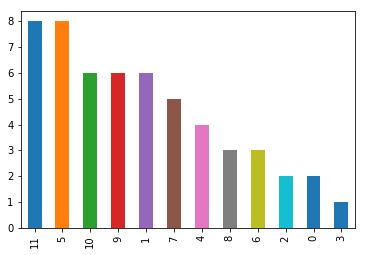

In [96]:
df.query('energy >= 0.7')['key'].value_counts().plot(kind='bar')

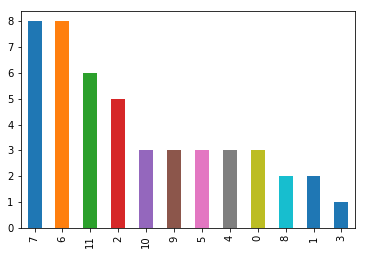

In [77]:
df.query('energy <= 0.7')['key'].value_counts().plot(kind='bar')

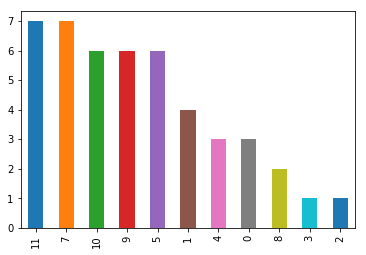

In [78]:
df.query('tempo >= 120')['key'].value_counts().plot(kind='bar')

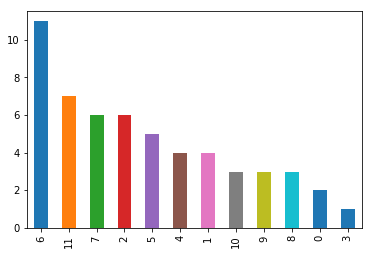

In [79]:
df.query('tempo <= 120')['key'].value_counts().plot(kind='bar')

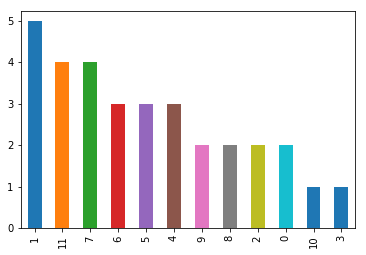

In [80]:
df.query('speechiness >= 0.09')['key'].value_counts().plot(kind='bar')

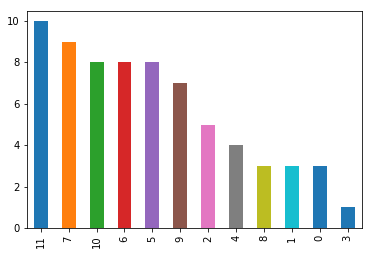

In [81]:
df.query('speechiness <= 0.09')['key'].value_counts().plot(kind='bar')

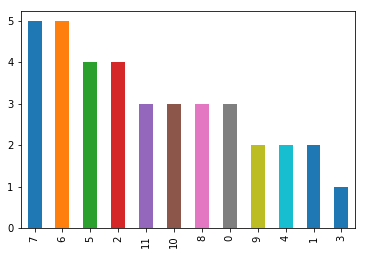

In [82]:
df.query('acousticness >= 0.14')['key'].value_counts().plot(kind="bar")

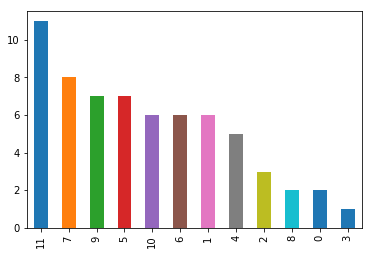

In [83]:
df.query('acousticness <= 0.14')['key'].value_counts().plot(kind="bar")

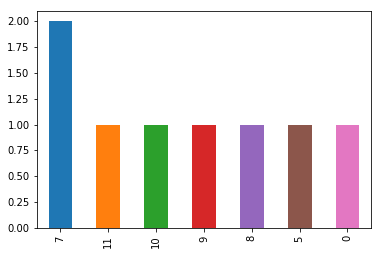

In [84]:
df.query('instrumentalness >= 0.004')['key'].value_counts().plot(kind="bar")

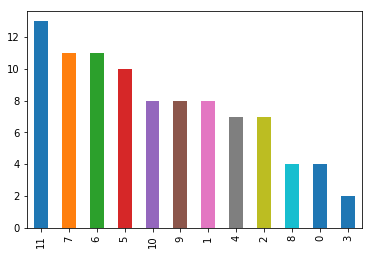

In [85]:
df.query('instrumentalness <= 0.004')['key'].value_counts().plot(kind="bar")

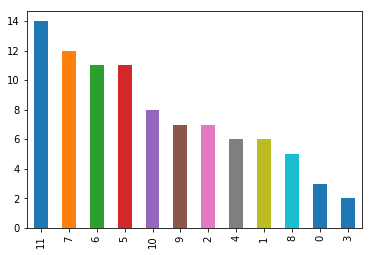

In [86]:
df.query('time_signature >= 3.93')['key'].value_counts().plot(kind="bar")

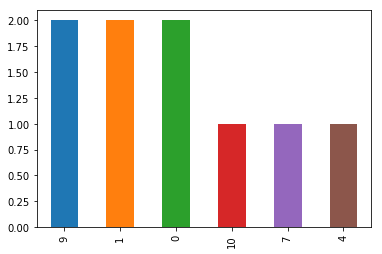

In [87]:
df.query('time_signature <= 3.93')['key'].value_counts().plot(kind="bar")

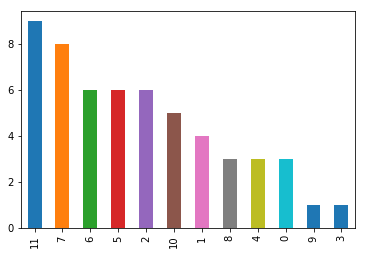

In [97]:
df.query('danceability >= 0.63')['key'].value_counts().plot(kind="bar")

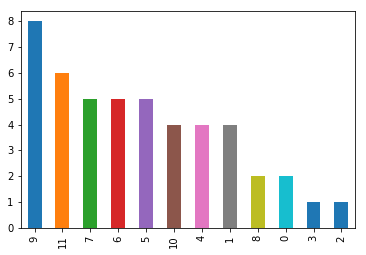

In [98]:
df.query('danceability <= 0.63')['key'].value_counts().plot(kind="bar")

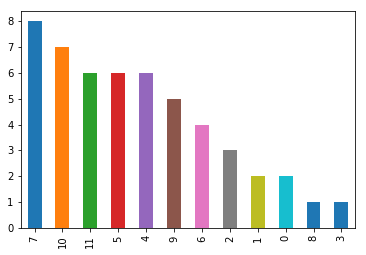

In [99]:
df.query('duration_ms >= 213490')['key'].value_counts().plot(kind="bar")

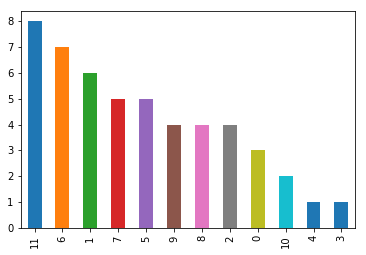

In [100]:
df.query('duration_ms <= 213490')['key'].value_counts().plot(kind="bar")

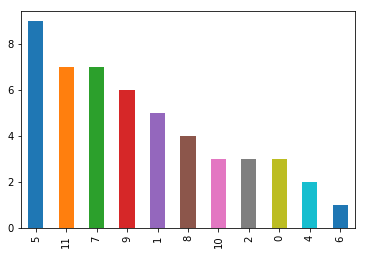

In [101]:
df.query('loudness >= -5.34')['key'].value_counts().plot(kind="bar")

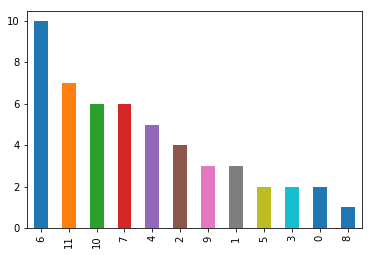

In [102]:
df.query('loudness <= -5.34')['key'].value_counts().plot(kind="bar")

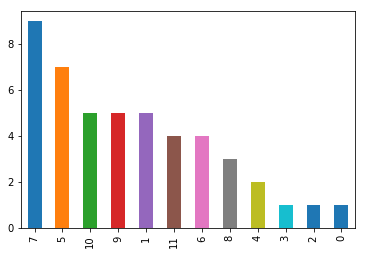

In [103]:
df.query('valence >= 0.47')['key'].value_counts().plot(kind="bar")

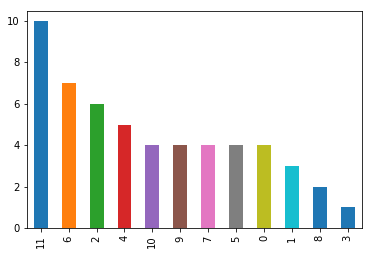

In [104]:
df.query('valence <= 0.47')['key'].value_counts().plot(kind="bar")